In [1]:
using Revise, ReachabilityAnalysis, BenchmarkTools
const RA = ReachabilityAnalysis

using Plots

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1273
ERROR: LoadError: LoadError: LoadError: syntax: "abstract type" at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/GLGM06/post.jl:18 expected "end", got "abstract"
Stacktrace:
 [1] top-level scope at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/GLGM06/post.jl:19
 [2] include at ./boot.jl:328 [inlined]
 [3] include_relative(::Module, ::String) at ./loading.jl:1105
 [4] include at ./Base.jl:31 [inlined]
 [5] include(::String) at /home/mforets/.julia/dev/ReachabilityAnalysis/src/ReachabilityAnalysis.jl:1
 [6] top-level scope at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/GLGM06/GLGM06.jl:45
 [7] include at ./boot.jl:328 [inlined]
 [8] include_relative(::Module, ::String) at ./loading.jl:1105
 [9] include at ./Base.jl:31 [inlined]
 [10] include(::String) at /home/mforets/.julia/dev/ReachabilityAnalysis/src/ReachabilityAnalysis.jl:1
 [11] to

ErrorException: Failed to precompile ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f] to /home/mforets/.julia/compiled/v1.3/ReachabilityAnalysis/fYI0z_CP3A3.ji.

## GLGM06 without inputs

In [3]:
p = @ivp(x' = -x, x(0) ∈ 0..1)

InitialValueProblem{LinearContinuousSystem{Float64,IdentityMultiple{Float64}},IntervalArithmetic.Interval{Float64}}(LinearContinuousSystem{Float64,IdentityMultiple{Float64}}([-1.0]), [0, 1])

In [4]:
F = solve(p, tspan=(0.0, 1.0));

In [5]:
F[2]

ReachSet{Float64,Zonotope{Float64}}(Zonotope{Float64}([0.4950001352492238], [0.4950496984999443]), [0.01, 0.0200001])

In [6]:
tspan(F[2])

[0.01, 0.0200001]

In [7]:
tspan(F)

[0, 1.00001]

In [10]:
F(tspan(F[1]))

2-element Array{ReachSet{Float64,Zonotope{Float64}},1}:
 ReachSet{Float64,Zonotope{Float64}}(Zonotope{Float64}([0.4999749693151643], [0.5000250306848357]), [0, 0.0100001])   
 ReachSet{Float64,Zonotope{Float64}}(Zonotope{Float64}([0.4950001352492238], [0.4950496984999443]), [0.01, 0.0200001])

In [12]:
tspan(F[1])

[0, 0.0100001]

In [13]:
tspan(F[2])

[0.01, 0.0200001]

In [16]:
F(1.)

ReachSet{Float64,Zonotope{Float64}}(Zonotope{Float64}([0.18577904469197865], [0.18579764633006918]), [0.989999, 1.00001])

In [23]:
F(0..2)

ArgumentError: ArgumentError: the time interval [0, 2] is not contained in the time span, [0, 1.00001], of the given flowpipe

In [32]:
setrep(F)

MethodError: MethodError: no method matching setrep(::Flowpipe{Float64,ReachSet{Float64,Zonotope{Float64}}})
Closest candidates are:
  setrep(!Matched::ReachSet{N,ST}) where {N, ST<:LazySet{N}} at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Flowpipes/reachsets.jl:239
  setrep(!Matched::SparseReachSet{N,ST,D} where D) where {N, ST<:LazySet{N}} at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Flowpipes/reachsets.jl:289

In [31]:
setrep(F[1])

Zonotope{Float64}

In [33]:
set(F, 1)

Zonotope{Float64}([0.4999749693151643], [0.5000250306848357])

In [34]:
set(F[1])

Zonotope{Float64}([0.4999749693151643], [0.5000250306848357])

In [53]:
set(F)

ArgumentError: ArgumentError: to retrieve the array of sets represented by this flowpipe, use the `array(...)` function, or use the function `set(...)` at a specific index, i.e. `set(F[ind])`, or simply `set(F, ind)`, to get the reach-set with index `ind` of the flowpipe `F`

In [48]:
array(F);

In [29]:
for fi in F[1:10]
    println(radius(set(fi)))
end

0.5000250306848357
0.4950496984999443
0.49012387169744565
0.48524705769055465
0.4804187687938066
0.47563852217428826
0.4709058398033541
0.46622024840882303
0.46158127942765115
0.4569884689590743
0.45244135771821836
0.44793949099016994
0.44348241858450477
0.4390696947902679
0.4347008783314027
0.4303755323226227
0.42609322422572227
0.42185352580632335
0.4176560130910508
0.41350026632513526
0.4093858699304369
0.4053124124638876
0.40127948657634616
0.39728668897186303
0.3933336203673505
0.38941988545265377
0.38554509285102
0.3817088550799599
0.3779107885124996
0.37415051333881727
0.37042765352826196
0.3667418367917502
0.36309269454453685
0.3594798618693562
0.35590297747993005
0.35236168368483867
0.3488556263517515
0.34538445487201347
0.34194782212558406
0.33854538444632454
0.33517680158763186
0.33184173668841277
0.3285398562393983
0.32527083004979185
0.32203433121425035
0.3188300360801931
0.3156576242154365
0.31251677837615033
0.3094071844751332
0.30632853155040385
0.3032805117341041
0.300

In [ ]:
solve(p, tspan=(0.0, 1.0), GLGM06(...))

In [54]:
A = rand(10, 10)
b = rand(10)
B = rand(10, 1)

p = @ivp(y' = Ay + B*u, u ∈ rand(Interval), y ∈ BallInf(rand(10), 10.0), y(0) ∈ rand(Hyperrectangle, dim=10));

In [70]:
@time F = solve(p, T=1.0, GLGM06(δ=0.01, max_order=2));
@time F = solve(p, T=1.0, GLGM06(δ=0.01, max_order=10));

  0.019266 seconds (111.52 k allocations: 12.541 MiB)
  0.041503 seconds (336.79 k allocations: 45.111 MiB, 16.36% gc time)


In [71]:
# remove_zero_generators = true
@btime solve($p, T=1.0, GLGM06(δ=0.01, max_order=10));
@btime solve($p, T=1.0, GLGM06(δ=0.01, max_order=2));

  29.710 ms (336769 allocations: 45.11 MiB)
  9.250 ms (111505 allocations: 12.54 MiB)


In [68]:
# remove_zero_generators = false
@btime solve($p, T=1.0, GLGM06(δ=0.01, max_order=10));
@btime solve($p, T=1.0, GLGM06(δ=0.01, max_order=2));

  25.756 ms (273733 allocations: 38.17 MiB)
  5.441 ms (93349 allocations: 10.73 MiB)


  9.777 ms (111505 allocations: 12.54 MiB)


In [77]:
ρ(rand(1), F[1])

0.7461900236363734

In [80]:
tspan(F[1])

[0, 0.0100001]

In [81]:
tspan(F)

[0, 1.00001]

In [82]:
tspan(F[10])

[0.0899999, 0.100001]

In [74]:
eachindex(F)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/GLGM06/post.jl
└ @ Revise /home/mforets/.julia/packages/Revise/439di/src/Revise.jl:564


MethodError: MethodError: no method matching keys(::Flowpipe{Float64,ReachSet{Float64,Zonotope{Float64}}})
Closest candidates are:
  keys(!Matched::Core.SimpleVector) at essentials.jl:602
  keys(!Matched::Cmd) at process.jl:639
  keys(!Matched::LibGit2.GitTree) at /home/mforets/.julia/packages/Revise/439di/src/git.jl:52
  ...

In [73]:
[F[i] for i in eachindex(F)]

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/GLGM06/post.jl
└ @ Revise /home/mforets/.julia/packages/Revise/439di/src/Revise.jl:564


MethodError: MethodError: no method matching keys(::Flowpipe{Float64,ReachSet{Float64,Zonotope{Float64}}})
Closest candidates are:
  keys(!Matched::Core.SimpleVector) at essentials.jl:602
  keys(!Matched::Cmd) at process.jl:639
  keys(!Matched::LibGit2.GitTree) at /home/mforets/.julia/packages/Revise/439di/src/git.jl:52
  ...

In [32]:
[Fi for Fi in F]

MethodError: MethodError: no method matching iterate(::Flowpipe{Float64,ReachSet{Float64,Zonotope{Float64}}})
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

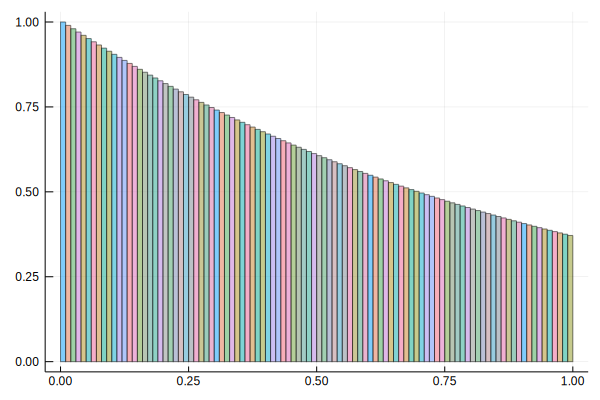

In [46]:
plot([Interval(RA.tspan(F[i])) × set(F[i]) for i in 1:length(F)])

## GLGM06 with inputs

In [15]:
p = @ivp(x' = -x + 1.0, x(0) ∈ 0..1) # Reporte error ?

LoadError: Base.Meta.ParseError("\"*\" is not a unary operator")

In [65]:
p = @ivp(x' = hcat(-1.0) * x + vcat(-10.0), x(0) ∈ 0..1)

InitialValueProblem{AffineContinuousSystem{Float64,Array{Float64,2},Array{Float64,1}},IntervalArithmetic.Interval{Float64}}(AffineContinuousSystem{Float64,Array{Float64,2},Array{Float64,1}}([-1.0], [-10.0]), [0, 1])

In [66]:
F = solve(p, T=5.0, GLGM06(δ=0.01));

In [50]:
@btime solve($p, T=1.0, GLGM06(δ=0.01));

  161.038 μs (1059 allocations: 70.08 KiB)


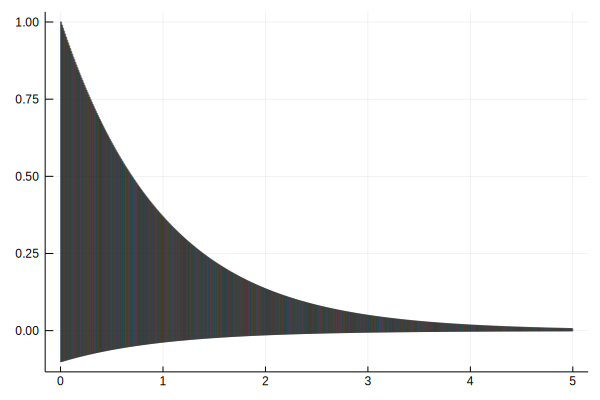

In [67]:
plot([Interval(RA.tspan(F[i])) × set(F[i]) for i in 1:length(F)])

----

In [ ]:
s = @ivp(x' = -hcat(1.0) * x, x(0) ∈ Interval(0, 1))
opC = Reachability.GLGM06(:δ=>0.01)
@btime Reachability.solve($s, Options(:T=>1.0), op=$opC);

In [ ]:
@btime RA.solve($ivp, T=1.0)

In [ ]:
RA.solve(ivp, tspan=0..1, GLGM06(δ=0.0001));

In [ ]:
ainv = ForwardApproximation(phi2_method="inverse")

@btime solve($ivp, T=1.0, GLGM06(δ=0.01, approximation_model=$ainv));

In [ ]:
solve(ivp, T=1.0, GLGM06(δ=0.01, approximation_model=ainv))

In [ ]:
RA.solve(ivp, T=1.0, GLGM06(δ=0.01, approximation_model=ainv))

In [ ]:
A = state_matrix(ivp)
X0 = initial_state(ivp)
ϕ = RA._exp(A, 0.01, "base")
A_abs = RA._elementwise_abs(A)
Phi2Aabs = RA.Φ₂(A_abs, 0.01, "inverse")

In [ ]:
X0int = convert(Interval, X0);

@which symmetric_interval_hull( (A * A) * X0int )

In [ ]:
symmetric_interval_hull(linear_map(A*A, X0int))

In [ ]:
function LazySets.symmetric_interval_hull(X::Interval)
    a = inf(X)
    b = sup(X)
    if abs(b) > abs(a)
        return Interval(-b, b)
        else . . 
    end
end

In [ ]:

Einit = symmetric_interval_hull(Phi2Aabs * symmetric_interval_hull((A * A) * X0))
Einit = symmetric_interval_hull(Phi2Aabs * symmetric_interval_hull((A * A) * X0))

In [ ]:
tspan = (0.0, 1.0)
T = 1.0
cpost = RA._get_cpost(ivp, tspan)
ivp_norm = RA._normalize(ivp) # normalize system

In [ ]:
cpost = GLGM06(δ=0.01, approximation_model=RA.ForwardApproximation(phi2_method="inverse"))

In [ ]:
ivp_discr = discretize(ivp_norm, cpost.δ, cpost.approximation_model) # discretize system

In [ ]:
@btime discretize($ivp_norm, $cpost.δ, $cpost.approximation_model) # discretize system

In [ ]:
@inline function Φ₂_inverse(A::IdentityMultiple, δ::Float64)
    λ = A.M.λ
    δλ = δ * λ
    α = (1/λ)^2 * (exp(δλ) - 1 - δλ)
    return I(α, size(A, 1))
end

In [ ]:
A = I(-1.0, 1)

In [ ]:
LazySets.Arrays.isinvertible(Matrix(A))

In [ ]:
@btime RA.Φ₂($A, 1.0, "base")

In [ ]:
@btime Φ₂_inverse($A, 1.0)

In [ ]:
(1/A.M.λ)^2 * (exp(δ*A.M.λ) - 1 - δ*A.M.λ)

In [ ]:
ivp_norm.x0 isa IntervalArithmetic.Interval

In [ ]:
@btime exp(Matrix(state_matrix($ivp_norm)))

In [ ]:
@btime exp(state_matrix($ivp_norm))

In [ ]:
@btime RA.post($cpost, $ivp, $tspan)

In [ ]:
state_matrix(ivp) * 0.1243

In [ ]:
@btime RA.post($cpost, $ivp, $tspan)

In [ ]:
@btime RA.solve($ivp, T=1.0)

In [ ]:
RA.solve(ivp, tspan=0..1)

In [ ]:
@btime exp($im)

In [ ]:
@btime _elementwise_abs($A)

In [ ]:
# get time horizon
t0 = tspan[1]
T = tspan[2]

In [ ]:
# normalize system to canonical form: x' = Ax + u, x ∈ X, u ∈ U
X0 = initial_state(ivp)
S = system(ivp)

In [ ]:
RA.init_GLGM06(ivp, tspan)

In [ ]:
RA.solve(p, T=1.0)

In [ ]:
solve(ivp T=1.0)

In [ ]:
RA._get_tspan(T=1.0)

In [ ]:
typeof(ReachSet(rand(Zonotope), 0..1))

## DE

In [ ]:
using DifferentialEquations

In [ ]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

In [ ]:
solve(prob);

In [ ]:
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);

In [ ]:
sol = solve(prob,Euler(),dt=1/2^4);

In [ ]:
sol = solve(prob,dt=1/2^4, Euler());

In [ ]:
using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

---

## BFFPSV18 without inputs

In [116]:
# TODO for later

## BFFPSV18 with inputs

In [115]:
# TODO for later

---

## TMJets